In [32]:
model <- lm(mpg ~ wt + cyl, data = mtcars)

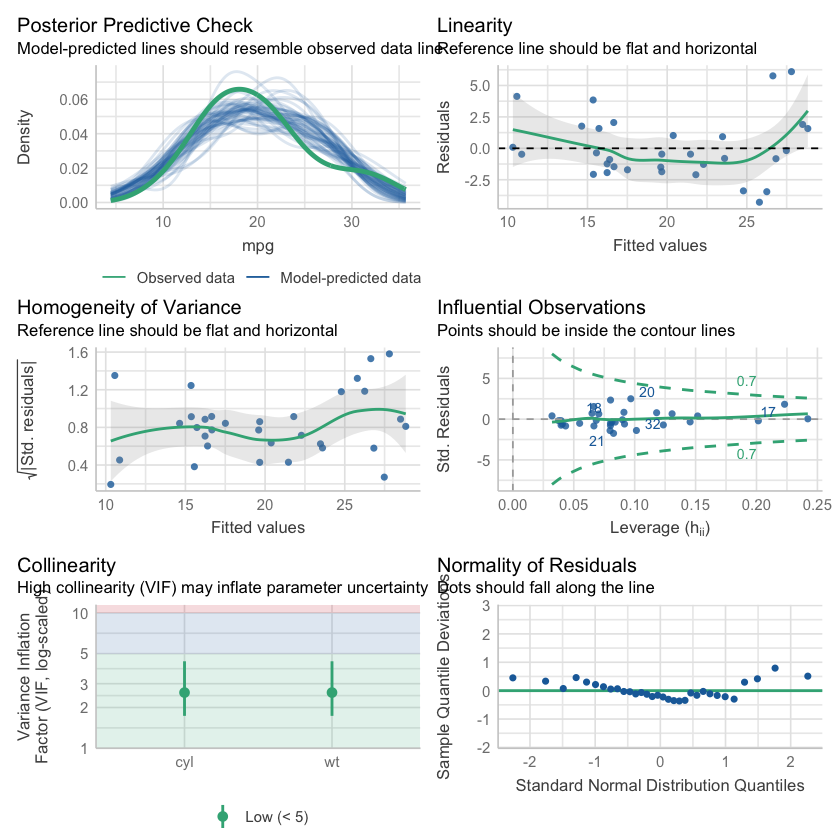

In [33]:
library(performance)
check_model(model)

In [4]:
model_performance(model)

,AIC,AICc,BIC,R2,R2_adjusted,RMSE,Sigma
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,156.0101,157.4915,161.873,0.8302274,0.8185189,2.444202,2.567516


In [48]:
model <- lm(mpg ~ wt + cyl, data = mtcars)

In [49]:
r2(model)

# R2 for Linear Regression
       R2: 0.830
  adj. R2: 0.819

In [52]:
library(tidyverse)
model <- glm(am ~ wt + cyl, data = mtcars, family = binomial)
r2(model)

# R2 for Logistic Regression
  Tjur's R2: 0.705

Cannot simulate residuals for models of class `glm`. Please try
  `check_model(..., residual_type = "normal")` instead.



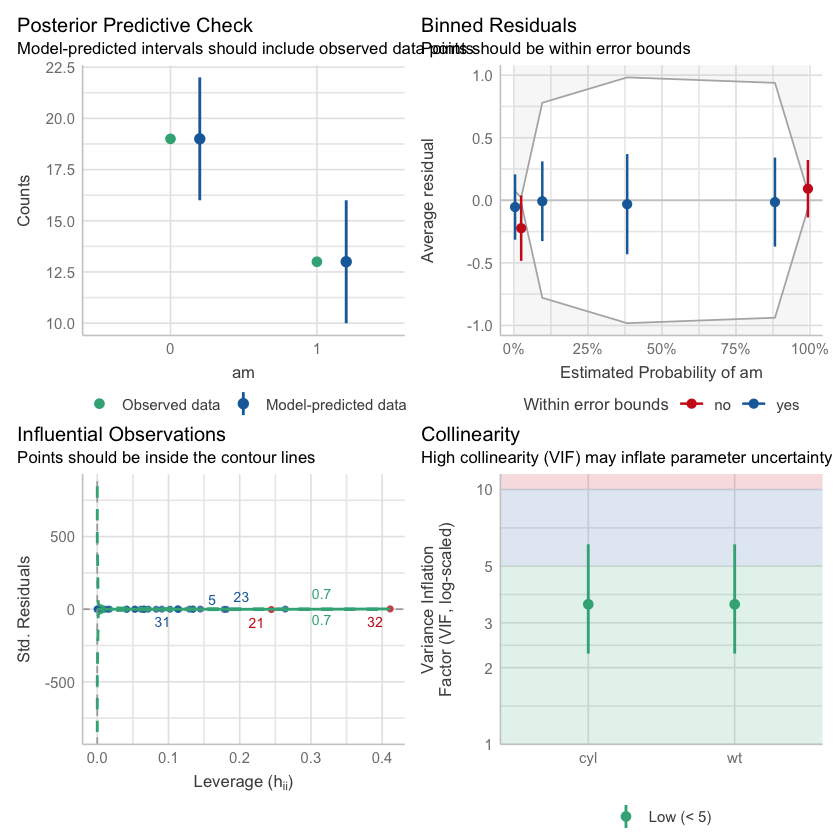

In [36]:
check_model(model)

In [37]:
library(MASS)
data(housing)
model <- polr(Sat ~ Infl + Type + Cont, weights = Freq, data = housing)
r2(model)

Nagelkerke's R2: 0.108

In [40]:
m1 <- lm(mpg ~ wt + cyl, data = mtcars)
model_performance(m1)

,AIC,AICc,BIC,R2,R2_adjusted,RMSE,Sigma
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,156.0101,157.4915,161.873,0.8302274,0.8185189,2.444202,2.567516


In [41]:
m2 <- glm(vs ~ wt + mpg, data = mtcars, family = "binomial")
model_performance(m2)

,AIC,AICc,BIC,R2_Tjur,RMSE,Sigma,Log_loss,Score_log,Score_spherical,PCP
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,31.29788,32.15502,35.69508,0.4776926,0.3594771,1,0.3952793,-14.90294,0.0945795,0.7429268


In [43]:
library(lme4)
m3 <- lmer(Reaction ~ Days + (1 + Days | Subject), data = sleepstudy)
model_performance(m3)

AIC,AICc,BIC,R2_conditional,R2_marginal,ICC,RMSE,Sigma
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1755.628,1756.114,1774.786,0.7992199,0.2786511,0.7216603,23.43805,25.5918


In [44]:
counts <- c(18, 17, 15, 20, 10, 20, 25, 13, 12)
outcome <- gl(3, 1, 9)
treatment <- gl(3, 3)
m4 <- glm(counts ~ outcome + treatment, family = poisson())

compare_performance(m1, m2, m3, m4, verbose = FALSE)

Name,Model,AIC,AIC_wt,AICc,AICc_wt,BIC,BIC_wt,RMSE,Sigma,...,Score_spherical,R2,R2_adjusted,R2_Tjur,Log_loss,PCP,R2_conditional,R2_marginal,ICC,R2_Nagelkerke
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m1,lm,156.01007,8.300244e-28,157.49155,6.074614e-28,161.87301,3.988454e-28,2.4442021,2.567516,...,NA,0.8302274,0.8185189,NA,NA,NA,NA,NA,NA,NA
m2,glm,31.29788,9.999970e-01,32.15502,1.000000e+00,35.69508,9.999837e-01,0.3594771,1.000000,...,0.0945795,NA,NA,0.4776926,0.3952793,0.7429268,NA,NA,NA,NA
m3,lmerMod,1763.98587,0.000000e+00,1764.47142,0.000000e+00,1783.14361,0.000000e+00,23.4380470,25.591796,...,NA,NA,NA,NA,NA,NA,0.7992199,0.2786511,0.7216603,NA
m4,glm,56.76132,2.955850e-06,76.76132,2.059990e-10,57.74744,1.626988e-05,3.0429031,1.000000,...,0.3238182,NA,NA,NA,NA,NA,NA,NA,NA,0.6571698


In [53]:
compare_performance(m1, m2, m3, m4, rank = TRUE, verbose = FALSE)

Name,Model,RMSE,Sigma,Score_log,Score_spherical,R2,R2_adjusted,R2_Tjur,Log_loss,PCP,R2_conditional,R2_marginal,ICC,R2_Nagelkerke,AIC_wt,AICc_wt,BIC_wt,Performance_Score
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m2,glm,0.3594771,1.000000,-14.902937,0.0945795,NA,NA,0.4776926,0.3952793,0.7429268,NA,NA,NA,NA,9.999970e-01,1.000000e+00,9.999837e-01,1.0000000
m4,glm,3.0429031,1.000000,-2.597851,0.3238182,NA,NA,NA,NA,NA,NA,NA,NA,0.6571698,2.955850e-06,2.059990e-10,1.626988e-05,0.3767491
m1,lm,2.4442021,2.567516,NA,NA,0.8302274,0.8185189,NA,NA,NA,NA,NA,NA,NA,8.300244e-28,6.074614e-28,3.988454e-28,0.3691854
m3,lmerMod,23.4380470,25.591796,NA,NA,NA,NA,NA,NA,NA,0.7992199,0.2786511,0.7216603,NA,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000


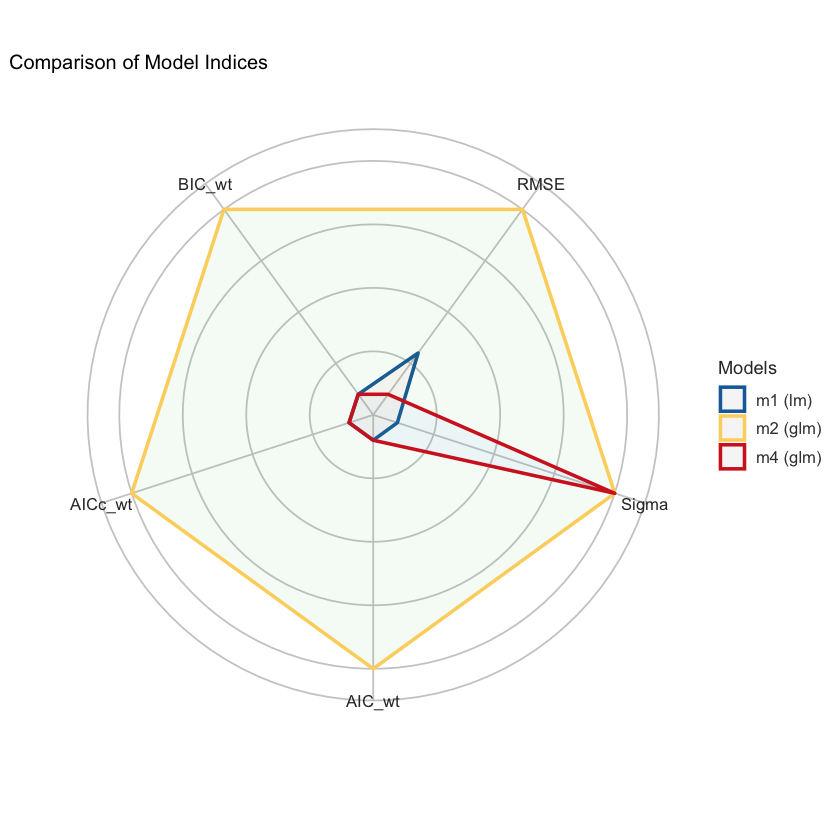

In [45]:
plot(compare_performance(m1, m2, m4, rank = TRUE, verbose = FALSE))

In [55]:
set.seed(123)
data(iris)

lm1 <- lm(Sepal.Length ~ Species, data = iris)
lm2 <- lm(Sepal.Length ~ Species + Petal.Length, data = iris)
lm3 <- lm(Sepal.Length ~ Species * Sepal.Width, data = iris)
lm4 <- lm(
  Sepal.Length ~ Species * Sepal.Width + Petal.Length + Petal.Width,
  data = iris
)

test_performance(lm1, lm2, lm3, lm4)

Name,Model,log_BF,BF,Omega2,p_Omega2,LR,p_LR
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lm1,lm,NA,NA,NA,NA,NA,NA
lm2,lm,61.10429,3.445528e+26,0.6898430,2.558841e-09,-6.253195,2.010698e-10
lm3,lm,17.66392,4.691860e+07,0.3566665,2.087980e-05,-3.442523,2.881577e-04
lm4,lm,68.80100,7.583929e+29,0.7298761,4.891690e-08,-7.772625,3.843811e-15
